# Visualizing Lotka-Volterra

We will be analyzing the predator prey model which, in an example looking at
foxes and rabbits, might look something like the following <br>
$$
\frac{\partial r}{\partial t} = \alpha r - \beta r f = r(\alpha-\beta f) \\
\frac{\partial f}{\partial t} = -\gamma f + \delta r f = f(\delta r - \gamma)
$$

We can understand these equations intuitively if we take r to be the population
of rabits and f to be the population of foxes. <br>

The rate of change of the rabbit population is expected to grow proportionally
to the rabbit population, as it is expected the rabbits will breed consistently
enough. However, the rabbits will also lose population based on the predation
rate of the foxes, which is dependent on the fox and rabbit populations. <br>

The same goes for the foxes. The foxes have a negative population term which is
an indication that food is lacking so they starve, but then they have a
population growth rate which is also dependent on r as it depends on how many
rabbits they can eat.

As an aside, one can easily see how this process can become wildly complex in a
short amount of time. If you consider another animal in the mix, then you have a
triply coupled system of partial differential equations. Ecologically, having
only 2 animals in the mix is not something anyone would consider as a realistic
system, so it is not hard to imagine how even simple ecological systems become
far too complex to model in any specific manner

In order to analyze a system like this, though, I am going to quickly write a
gradient function.

In [368]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as p

In [477]:
# initial conditions
params1  = [1., 0.1, 1.5, .75]
params2  = [0.6, 1.2, .5, .9] 
pops     = [10, 5]
dt       = 1000
minT     = 0
maxT     = 15

a,b,c,d      = params1
t            = np.linspace(minT, maxT, dt)

## we have to create our function rather specifically so we can use the odeint function
## we have a dummy varibale t, and then all our intial conditions
def gradient(pop_vec, t):
    R = pop_vec[0]
    F = pop_vec[1]
    return np.array([R * (a - b*F), 
                     F * (d*R - c)])

So when we evaluate this gradient function at a given pop_vec ((r,f) pair) it
will tell us the immediate rate of change of the system per time step depending
on the units of our system.

If we were to integrate this function over some finite time interval, we would
get the total population at a given time t in the time interval.

Now we want to try and plot these to characterize our system. We start by
defining all of our initial conditions in a way that we can modify them easily
in the future.

In [478]:
sol = integrate.odeint(gradient, pops, t)
rabbits, foxes = sol.T

Now we go ahead an plot the data we get from this

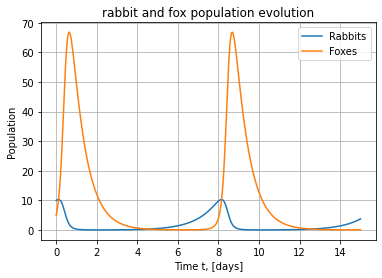

alpha: 1.0 
beta:  0.1 
gamma: 1.5 
delta: 0.75


In [479]:
p.figure()
p.grid()
p.title("rabbit and fox population evolution")
p.plot(t, rabbits, label = 'Rabbits')
p.plot(t, foxes, label = "Foxes")
p.xlabel('Time t, [days]')
p.ylabel('Population')
p.legend()

p.show()
print("alpha:", a, "\nbeta: ", b, "\ngamma:", c, "\ndelta:", d)

We know that our vector produced by the gradient function defines a vector
field. What follows is an attempt at plotting said vector field

<Figure size 432x288 with 0 Axes>

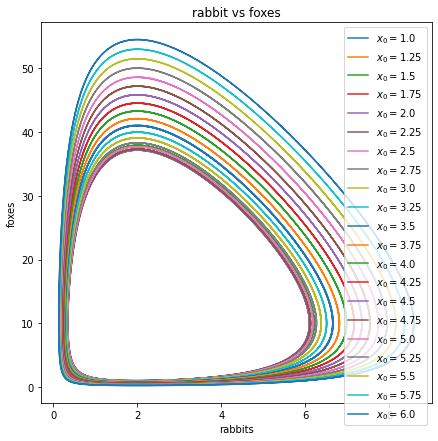

In [480]:
p.figure()
p.figure(figsize=(7,7))

IC = np.linspace(1.0, 6.0, 21) # initial conditions for deer population (prey)
for rabbit in IC:
    X0 = [rabbit, 1.0]
    Xs = integrate.odeint(gradient, X0, t)
    p.plot(Xs[:,0], Xs[:,1], "-", label = "$x_0 =$"+str(X0[0]))
p.xlabel("rabbits")
p.ylabel("foxes")
p.legend()
p.title("rabbit vs foxes");


In [489]:
rabbits = np.linspace(0, 4, 40)
foxes   = np.linspace(0, 40, 40)

x, y = np.meshgrid(rabbits, foxes)
dx, dy = gradient([x, y], t=0)

m = np.hypot(dx, dy)
m[m==0] = 1
dx /= m
dy /= m

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


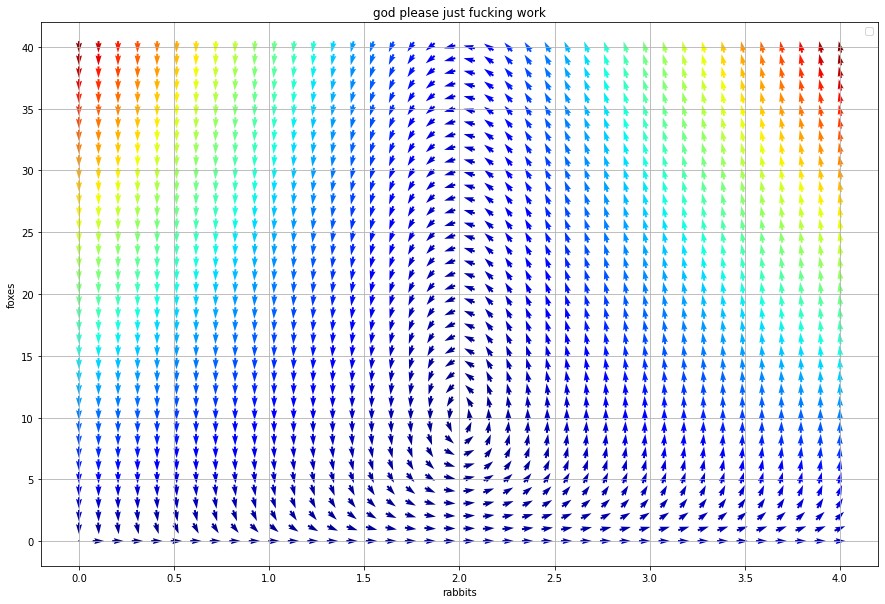

In [490]:
p.figure(figsize=(15,10))
p.title('god please just fucking work')
p.quiver(x, y, dx, dy, m, pivot='mid', cmap=p.cm.jet)
p.xlabel('rabbits')
p.ylabel('foxes')
p.legend()
p.grid()